In [6]:
import pandas as pd
import nltk
import re
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')

# Load CSV
file_path = 'twitter_training.csv'
df = pd.read_csv(file_path, header=None, names=["ID", "Game", "Sentiment", "Tweet"])

# Drop missing values tweets and sentiment
df.dropna(subset=["Sentiment", "Tweet"], inplace=True)

# Drop deduplicate by ID
df = df.drop_duplicates(subset='ID')

# Normalize sentiment labels
def normalize_sentiment(s):
    s = s.lower()
    if s == 'positive':
        return 'Positive'
    elif s == 'negative':
        return 'Negative'
    else:
        return 'Neutral'

df['MappedSentiment'] = df['Sentiment'].apply(normalize_sentiment)

# Tokenize raw tweets
df['RawTokens'] = df['Tweet'].apply(lambda x: word_tokenize(str(x).lower()))
all_raw_tokens = [token for tokens in df['RawTokens'] for token in tokens]

# Word stats before cleaning
total_words_raw = len(all_raw_tokens)
unique_words_raw = len(set(all_raw_tokens))
avg_words_raw = total_words_raw / len(df)

# Character stats before cleaning
df['RawCharCount'] = df['Tweet'].apply(lambda x: len(str(x)))
total_chars_raw = df['RawCharCount'].sum()
avg_chars_raw = total_chars_raw / len(df)


# Method to clean the twee
def clean_tweet(text):
    text = text.lower()
    text = re.sub(r'@\w+', '', text)
    text = re.sub(r'http\S+|www\S+', '', text)
    text = re.sub(r'\d+', '', text)
    
    # Remove punctuation but keep apostrophes at first
    punctuation_without_apostrophe = string.punctuation.replace("'", "")
    text = re.sub(rf"[{re.escape(punctuation_without_apostrophe)}]", '', text)
    
    # Remove apostrophes manually
    text = text.replace("'", "")
    
    text = re.sub(r'\s+', ' ', text).strip()
    return text

df['CleanTweet'] = df['Tweet'].apply(clean_tweet)

# Tokenize cleaned tweets and remove stopwords
stop_words = set(stopwords.words('english'))

def tokenize_and_filter(text):
    tokens = word_tokenize(text)
    return [word for word in tokens if word not in stop_words]

df['Tokens'] = df['CleanTweet'].apply(tokenize_and_filter)

# Word stats after cleaning
all_clean_tokens = [token for tokens in df['Tokens'] for token in tokens]
total_words_clean = len(all_clean_tokens)
unique_words_clean = len(set(all_clean_tokens))
avg_words_clean = total_words_clean / len(df)

# Character stats after cleaning
df['CleanCharCount'] = df['CleanTweet'].apply(lambda x: len(x))
total_chars_clean = df['CleanCharCount'].sum()
avg_chars_clean = total_chars_clean / len(df)

# Display data calculations 
print("Sentiment Distribution:")
print(df['MappedSentiment'].value_counts())

print("\nBEFORE Cleaning:")
print("Total Words:", total_words_raw)
print("Unique Words:", unique_words_raw)
print("Average Words per Tweet:", round(avg_words_raw, 2))
print("Total Characters:", total_chars_raw)
print("Average Characters per Tweet:", round(avg_chars_raw, 2))

print("\nAFTER Cleaning:")
print("Total Words:", total_words_clean)
print("Unique Words:", unique_words_clean)
print("Average Words per Tweet:", round(avg_words_clean, 2))
print("Total Characters:", total_chars_clean)
print("Average Characters per Tweet:", round(avg_chars_clean, 2))


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ryans\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ryans\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Sentiment Distribution:
MappedSentiment
Neutral     5218
Negative    3757
Positive    3472
Name: count, dtype: int64

BEFORE Cleaning:
Total Words: 271903
Unique Words: 23941
Average Words per Tweet: 21.84
Total Characters: 1339723
Average Characters per Tweet: 107.63

AFTER Cleaning:
Total Words: 126450
Unique Words: 19652
Average Words per Tweet: 10.16
Total Characters: 1167354
Average Characters per Tweet: 93.79


In [19]:
# Display all unique game names
unique_games = df['Game'].dropna().unique()

print(" Unique Games Mentioned in the Dataset:")
for i, game in enumerate(unique_games, start=1):
    print(f"{i}. {game}")


Unique Games Mentioned in the Dataset:
1. Borderlands
2. CallOfDutyBlackopsColdWar
3. Amazon
4. Overwatch
5. Xbox(Xseries)
6. NBA2K
7. Dota2
8. PlayStation5(PS5)
9. WorldOfCraft
10. CS-GO
11. Google
12. AssassinsCreed
13. ApexLegends
14. LeagueOfLegends
15. Fortnite
16. Microsoft
17. Hearthstone
18. Battlefield
19. PlayerUnknownsBattlegrounds(PUBG)
20. Verizon
21. HomeDepot
22. FIFA
23. RedDeadRedemption(RDR)
24. CallOfDuty
25. TomClancysRainbowSix
26. Facebook
27. GrandTheftAuto(GTA)
28. MaddenNFL
29. johnson&johnson
30. Cyberpunk2077
31. TomClancysGhostRecon
32. Nvidia


In [23]:
# Count the number of unique IDs in column 1
unique_id_count = df['ID'].nunique()

print("Number of Unique IDs in Column 1:", unique_id_count)


Number of Unique IDs in Column 1: 12447


In [37]:
# Count and sort the number of tweets per game
game_counts = df['Game'].value_counts()

print("Games Ordered by Number of Tweets:\n")
print(game_counts)


Games Ordered by Number of Tweets:

Game
TomClancysRainbowSix                 400
MaddenNFL                            400
Microsoft                            400
LeagueOfLegends                      399
CallOfDuty                           399
Verizon                              397
CallOfDutyBlackopsColdWar            396
ApexLegends                          396
Facebook                             395
WorldOfCraft                         394
Dota2                                394
NBA2K                                392
TomClancysGhostRecon                 391
Battlefield                          391
FIFA                                 390
Xbox(Xseries)                        389
Overwatch                            389
johnson&johnson                      388
Amazon                               386
PlayStation5(PS5)                    385
HomeDepot                            385
Cyberpunk2077                        384
CS-GO                                384
GrandTheftAuto(G

In [51]:
# Filter only rows with valid Game and non-neutral sentiment
df_pn = df[df['MappedSentiment'].isin(['Positive', 'Negative'])].dropna(subset=['Game'])

# Group by Game and MappedSentiment
pn_counts = df_pn.groupby(['Game', 'Sentiment']).size().unstack(fill_value=0)

# Ensure both Positive and Negative columns exist
if 'Positive' not in pn_counts.columns:
    pn_counts['Positive'] = 0
if 'Negative' not in pn_counts.columns:
    pn_counts['Negative'] = 0

# Calculate total (Positive + Negative only)
pn_counts['Total'] = pn_counts['Positive'] + pn_counts['Negative']

# Calculate % of positive tweets
pn_counts['Positive %'] = (pn_counts['Positive'] / pn_counts['Total']) * 100

# Sort by Positive %
pn_sorted = pn_counts.sort_values(by='Positive %', ascending=False)

# Display results
print( "Games Ordered by % of Positive Tweets (Neutral Omitted):\n")
print(pn_sorted[['Positive', 'Negative', 'Total', 'Positive %']].round(2))


Games Ordered by % of Positive Tweets (Neutral Omitted):

Sentiment                          Positive  Negative  Total  Positive %
Game                                                                    
AssassinsCreed                          241        63    304       79.28
RedDeadRedemption(RDR)                  155        51    206       75.24
Cyberpunk2077                           161        65    226       71.24
Borderlands                             170        71    241       70.54
CS-GO                                   128        58    186       68.82
WorldOfCraft                            123        57    180       68.33
Xbox(Xseries)                           132        63    195       67.69
PlayStation5(PS5)                       157        76    233       67.38
Hearthstone                             139        88    227       61.23
Nvidia                                  136        87    223       60.99
CallOfDutyBlackopsColdWar               144        96    240      

In [8]:
from nltk.probability import FreqDist
from collections import defaultdict
import pandas as pd

def analyze_sentiment_tokens(df_subset, label):
    # Flatten tokens
    all_tokens = [token for tokens in df_subset['Tokens'] for token in tokens]

    # Frequency distribution
    freq_dist = FreqDist(all_tokens)

    print(f"\n Top 20 Most Frequent Words in {label} Tweets:")
    for word, freq in freq_dist.most_common(21):
        print(f"{word}: {freq}")

    # Lexical dispersion
    dispersion = defaultdict(int)
    for tokens in df_subset['Tokens']:
        for word in set(tokens):  # unique words per tweet
            dispersion[word] += 1

    # Create DataFrame
    dispersion_df = pd.DataFrame({
        'Word': list(dispersion.keys()),
        'Dispersion': list(dispersion.values()),
        'Frequency': [freq_dist[word] for word in dispersion.keys()]
    }).sort_values(by='Frequency', ascending=False)

    print(f"\n Top 20 Words by Lexical Dispersion in {label} Tweets:")
    print(dispersion_df.head(21).to_string(index=False))

df_pos = df[df['MappedSentiment'] == 'Positive']
df_neg = df[df['MappedSentiment'] == 'Negative']

analyze_sentiment_tokens(df_pos, "Positive")
analyze_sentiment_tokens(df_neg, "Negative")




 Top 20 Most Frequent Words in Positive Tweets:
’: 626
game: 390
love: 315
good: 280
like: 236
im: 213
new: 200
best: 200
really: 199
one: 184
playing: 175
play: 174
fun: 165
get: 160
time: 158
great: 154
wait: 150
games: 144
got: 133
thank: 132
ps: 131

 Top 20 Words by Lexical Dispersion in Positive Tweets:
   Word  Dispersion  Frequency
      ’         453        626
   game         334        390
   love         290        315
   good         266        280
   like         213        236
     im         195        213
   best         190        200
    new         185        200
 really         187        199
    one         173        184
playing         166        175
   play         167        174
    fun         159        165
    get         150        160
   time         153        158
  great         148        154
   wait         143        150
  games         133        144
    got         130        133
  thank         129        132
     ps         115        131

 Top 


 Top 20 Most Frequent Words in Positive Tweets (excluding top word):
game: 390
love: 315
good: 280
like: 236
im: 213
new: 200
best: 200
really: 199
one: 184
playing: 175
play: 174
fun: 165
get: 160
time: 158
great: 154
wait: 150
games: 144
got: 133
thank: 132
ps: 131

 Top 20 Words by Lexical Dispersion in Positive Tweets:
   Word  Dispersion  Frequency
      ’         453        626
   game         334        390
   love         290        315
   good         266        280
   like         213        236
     im         195        213
   best         190        200
    new         185        200
 really         187        199
    one         173        184
playing         166        175
   play         167        174
    fun         159        165
    get         150        160
   time         153        158
  great         148        154
   wait         143        150
  games         133        144
    got         130        133
  thank         129        132


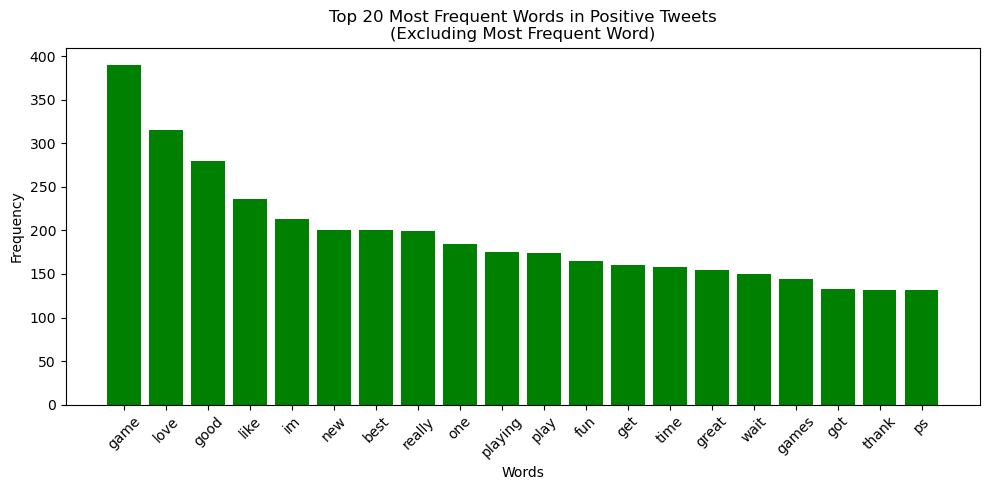


 Top 20 Most Frequent Words in Negative Tweets (excluding top word):
game: 660
get: 286
like: 282
shit: 265
fix: 246
fuck: 240
play: 207
fucking: 201
please: 195
got: 178
still: 162
cant: 159
one: 158
fifa: 155
im: 152
people: 150
even: 142
really: 129
going: 129
time: 127

 Top 20 Words by Lexical Dispersion in Negative Tweets:
   Word  Dispersion  Frequency
      ’         684       1021
   game         549        660
    get         260        286
   like         266        282
   shit         250        265
    fix         238        246
   fuck         213        240
   play         189        207
fucking         177        201
 please         175        195
    got         160        178
  still         159        162
   cant         151        159
    one         153        158
   fifa         144        155
     im         141        152
 people         144        150
   even         139        142
  going         124        129
 really         117        129


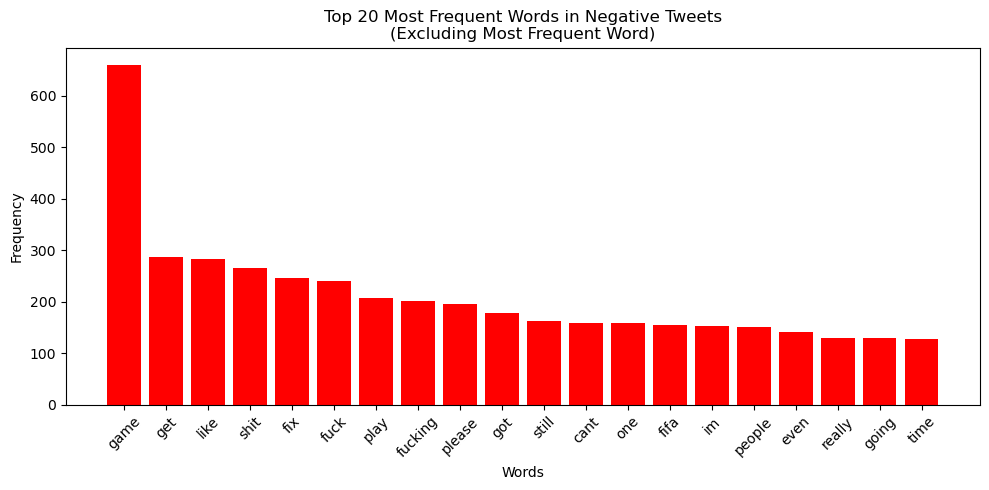

In [10]:
from nltk.probability import FreqDist
from collections import defaultdict
import pandas as pd
import matplotlib.pyplot as plt

def analyze_sentiment_tokens(df_subset, label):
    # Flatten tokens
    all_tokens = [token for tokens in df_subset['Tokens'] for token in tokens]

    # Frequency distribution
    freq_dist = FreqDist(all_tokens)

    # Get the top 21 and omit the highest (index 0)
    top_words_full = freq_dist.most_common(21)
    top_words = top_words_full[1:21]  # Omit the most frequent word

    print(f"\n Top 20 Most Frequent Words in {label} Tweets (excluding top word):")
    for word, freq in top_words:
        print(f"{word}: {freq}")

    # Lexical dispersion
    dispersion = defaultdict(int)
    for tokens in df_subset['Tokens']:
        for word in set(tokens):  # unique words per tweet
            dispersion[word] += 1

    # Create DataFrame
    dispersion_df = pd.DataFrame({
        'Word': list(dispersion.keys()),
        'Dispersion': list(dispersion.values()),
        'Frequency': [freq_dist[word] for word in dispersion.keys()]
    }).sort_values(by='Frequency', ascending=False)

    print(f"\n Top 20 Words by Lexical Dispersion in {label} Tweets:")
    print(dispersion_df.head(20).to_string(index=False))

    # Plot frequency bar chart
    words, counts = zip(*top_words)
    plt.figure(figsize=(10, 5))
    plt.bar(words, counts, color='green' if label == 'Positive' else 'red')
    plt.title(f"Top 20 Most Frequent Words in {label} Tweets\n(Excluding Most Frequent Word)")
    plt.xlabel("Words")
    plt.ylabel("Frequency")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# --- Separate DataFrames ---
df_pos = df[df['MappedSentiment'] == 'Positive']
df_neg = df[df['MappedSentiment'] == 'Negative']

# --- Run Analysis with Bar Graphs ---
analyze_sentiment_tokens(df_pos, "Positive")
analyze_sentiment_tokens(df_neg, "Negative")


In [12]:
import nltk
from nltk import classify, NaiveBayesClassifier
from sklearn.metrics import classification_report
import random
import time

# 1. Filter Positive and Negative tweets only
df_pn = df[df['MappedSentiment'].isin(['Positive', 'Negative'])].copy()

# 2. Create feature extractor from tokens
def extract_features(tokens):
    return {word: True for word in tokens}

# 3. Apply feature extraction to all tweets
df_pn['features'] = df_pn['Tokens'].apply(extract_features)

# 4. Prepare data for training
dataset = list(zip(df_pn['features'], df_pn['MappedSentiment']))

# 5. Shuffle and split into training and test sets (80/20)
random.shuffle(dataset)
split_idx = int(len(dataset) * 0.8)
train_data = dataset[:split_idx]
test_data = dataset[split_idx:]

# 6. Train Naive Bayes classifier
classifier = NaiveBayesClassifier.train(train_data)

# 7. Evaluate performance
print(" Model Accuracy:", round(classify.accuracy(classifier, test_data) * 100, 2), "%")

# 8. Detailed classification report
y_true = [label for (_, label) in test_data]

# ⏱️ Time prediction step
start_time = time.time()
y_pred = [classifier.classify(features) for (features, _) in test_data]
end_time = time.time()

# Calculate average processing time per tweet
total_time = end_time - start_time
avg_time_per_tweet = total_time / len(test_data)

# 9. Print report
print("\n Classification Report:\n")
from sklearn.metrics import precision_recall_fscore_support

# Get precision, recall, f1 without support
labels = ['Positive', 'Negative']
precision, recall, f1, _ = precision_recall_fscore_support(y_true, y_pred, labels=labels)

# Print custom report without support
print(f"\n Classification Report:")
print("{:<10} {:>10} {:>10} {:>10}".format("Label", "Precision", "Recall", "F1-Score"))
for i, label in enumerate(labels):
    print("{:<10} {:>10.2f} {:>10.2f} {:>10.2f}".format(label, precision[i]*100, recall[i]*100, f1[i]*100))


# 10. Performance
print(f" Average Processing Time per Tweet: {avg_time_per_tweet:.6f} seconds")

# 11. Show most informative features
classifier.show_most_informative_features(20)



 Model Accuracy: 79.18 %

 Classification Report:


 Classification Report:
Label       Precision     Recall   F1-Score
Positive        82.78      71.74      76.86
Negative        76.60      86.11      81.08
 Average Processing Time per Tweet: 0.000033 seconds
Most Informative Features
                     fix = True           Negati : Positi =     27.6 : 1.0
                 awesome = True           Positi : Negati =     20.1 : 1.0
                 excited = True           Positi : Negati =     19.6 : 1.0
                 trailer = True           Positi : Negati =     17.7 : 1.0
                    dope = True           Positi : Negati =     16.3 : 1.0
                 enjoyed = True           Positi : Negati =     14.1 : 1.0
                 servers = True           Negati : Positi =     13.3 : 1.0
                  banned = True           Negati : Positi =     12.4 : 1.0
                   sucks = True           Negati : Positi =     12.4 : 1.0
                 loading = True       